In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
train = pd.read_csv('../data/original/train.csv', parse_dates=['application_date']) 
test = pd.read_csv('../data/original/test.csv')
train.shape, test.shape

((80402, 6), (180, 3))

In [12]:
train[train['application_date']<'2017-04-02']

,application_date,segment,branch_id,state,zone,case_count
0,2017-04-01,1,1.0,WEST BENGAL,EAST,40.0
806,2017-04-01,1,3.0,DELHI,NORTH,58.0
1612,2017-04-01,1,5.0,KARNATAKA,SOUTH,10.0
2418,2017-04-01,1,7.0,WEST BENGAL,EAST,2.0
3224,2017-04-01,1,8.0,WEST BENGAL,EAST,13.0
...,...,...,...,...,...,...
76182,2017-04-01,2,NaN,PUNJAB,NaN,0.0
77026,2017-04-01,2,NaN,TAMIL NADU,NaN,458.0
77870,2017-04-01,2,NaN,TRIPURA,NaN,0.0
78714,2017-04-01,2,NaN,UTTAR PRADESH,NaN,27.0


In [11]:
train.groupby(['segment', 'application_date'])[['case_count']].sum()

case_count
segment application_date            
1       2017-04-01             299.0
        2017-04-03              42.0
        2017-04-04              23.0
        2017-04-05            1530.0
        2017-04-07            1341.0
...                              ...
2       2019-07-19           29778.0
        2019-07-20           26123.0
        2019-07-21           12267.0
        2019-07-22           27292.0
        2019-07-23           29183.0

[1650 rows x 1 columns]

In [4]:
test.head()

,id,application_date,segment
0,1,2019-07-06,1
1,2,2019-07-07,1
2,3,2019-07-08,1
3,4,2019-07-09,1
4,5,2019-07-10,1


In [43]:
test.tail()

,id,application_date,segment
175,176,2019-10-20,2
176,177,2019-10-21,2
177,178,2019-10-22,2
178,179,2019-10-23,2
179,180,2019-10-24,2


In [5]:
train.describe()

,segment,branch_id,case_count
count,80402.000000,66898.000000,80402.000000
mean,1.167956,118.831325,185.481841
std,0.373830,94.285434,749.602925
min,1.000000,1.000000,0.000000
25%,1.000000,36.000000,0.000000
50%,1.000000,82.000000,18.000000
75%,1.000000,248.000000,60.000000
max,2.000000,271.000000,13787.000000


e:\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


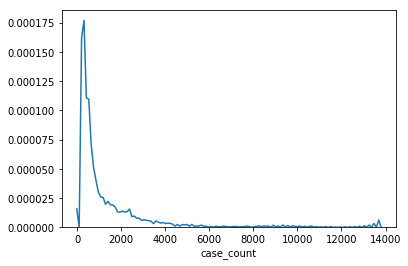

In [11]:
sns.distplot(train['case_count'], hist=False)

In [17]:
train.groupby(['segment', 'state'])[['case_count']].median()

case_count
segment state                     
1       ANDHRA PRADESH         0.0
        ASSAM                 22.0
        BIHAR                 13.0
        CHHATTISGARH           0.0
        DELHI                136.0
        GUJARAT               20.0
        HARYANA                0.0
        JHARKHAND             20.0
        KARNATAKA             17.0
        KERALA                11.0
        MADHYA PRADESH        35.0
        MAHARASHTRA           24.0
        ORISSA                29.5
        PUNJAB                12.0
        TAMIL NADU             9.0
        TELANGANA              0.0
        TRIPURA               29.0
        UTTAR PRADESH          0.0
        UTTARAKHAND           20.0
        WEST BENGAL           36.0
2       ASSAM                524.5
        BIHAR                876.5
        CHHATTISGARH         331.0
        GUJARAT              280.5
        HARYANA                0.0
        JHARKHAND              9.0
        KARNATAKA           1629.0
        KERALA               762.0
        MADHYA PRADESH       555.0
        MAHARASHTRA          305.0
        ORISSA               913.5
        PUNJAB                 0.0
        TAMIL NADU          3686.0
        TRIPURA               80.0
        UTTAR PRADESH        283.0
        WEST BENGAL         1239.5

In [45]:
train.groupby(['segment', 'state'])[['case_count']].mean()

case_count
segment state                      
1       ANDHRA PRADESH     3.517370
        ASSAM             36.667804
        BIHAR             22.780397
        CHHATTISGARH       3.968983
        DELHI            168.486352
        GUJARAT           50.707506
        HARYANA            3.736973
        JHARKHAND         22.158809
        KARNATAKA         59.541770
        KERALA            11.795285
        MADHYA PRADESH    42.196030
        MAHARASHTRA       44.694312
        ORISSA            36.401158
        PUNJAB            18.079156
        TAMIL NADU        22.158632
        TELANGANA         56.153226
        TRIPURA           32.457816
        UTTAR PRADESH      4.251152
        UTTARAKHAND       24.782258
        WEST BENGAL       52.036911
2       ASSAM            764.234597
        BIHAR           1554.239336
        CHHATTISGARH     350.644550
        GUJARAT          346.502370
        HARYANA            0.000000
        JHARKHAND        158.571090
        KARNATAKA       1836.650474
        KERALA           958.420616
        MADHYA PRADESH   641.349526
        MAHARASHTRA      340.305687
        ORISSA          1476.232227
        PUNJAB             0.000000
        TAMIL NADU      4727.574645
        TRIPURA          177.534360
        UTTAR PRADESH    306.938389
        WEST BENGAL     1437.900474

In [55]:
loh = pd.read_csv('data/list_of_hol.csv')
loh.drop(columns="Day", inplace=True)
loh.head()

,Holiday,Type,year,month,day
0,Last day of Hanukkah,Observance,2017,1,1
1,New Year's Day,Restricted Holiday,2017,1,1
2,Guru Govind Singh Jayanti,Restricted Holiday,2017,1,5
3,Pongal,Restricted Holiday,2017,1,14
4,Makar Sankranti,Restricted Holiday,2017,1,14


In [50]:
train['day'] = pd.DatetimeIndex(train['application_date']).day
train['year'] = pd.DatetimeIndex(train['application_date']).year
train['month'] = pd.DatetimeIndex(train['application_date']).month
train.head()

,application_date,segment,branch_id,state,zone,case_count,day,year,month
0,2017-04-01,1,1.0,WEST BENGAL,EAST,40.0,1,2017,4
1,2017-04-03,1,1.0,WEST BENGAL,EAST,5.0,3,2017,4
2,2017-04-04,1,1.0,WEST BENGAL,EAST,4.0,4,2017,4
3,2017-04-05,1,1.0,WEST BENGAL,EAST,113.0,5,2017,4
4,2017-04-07,1,1.0,WEST BENGAL,EAST,76.0,7,2017,4


In [68]:
test['day'] = pd.DatetimeIndex(test['application_date']).day
test['year'] = pd.DatetimeIndex(test['application_date']).year
test['month'] = pd.DatetimeIndex(test['application_date']).month
test.head()

,id,application_date,segment,day,year,month
0,1,2019-07-06,1,6,2019,7
1,2,2019-07-07,1,7,2019,7
2,3,2019-07-08,1,8,2019,7
3,4,2019-07-09,1,9,2019,7
4,5,2019-07-10,1,10,2019,7


In [65]:
df_train = pd.merge(train, loh, left_on=['day', 'year', 'month'], right_on=['day', 'year', 'month'], how="left")

In [66]:
df_train.drop(columns=["branch_id", 'zone', 'state'], inplace=True)

In [67]:
df_train.isnull().sum()

application_date        0
segment                 0
case_count              0
day                     0
year                    0
month                   0
Holiday             66941
Type                66941
dtype: int64

In [69]:
df_test = pd.merge(test, loh, left_on=['day', 'year', 'month'], right_on=['day', 'year', 'month'], how="left")

In [70]:
df_test.isnull().sum()

id                    0
application_date      0
segment               0
day                   0
year                  0
month                 0
Holiday             152
Type                152
dtype: int64

In [71]:
df_train.to_csv('training_v1.csv', index=False)

In [72]:
df_test.to_csv('test_v1.csv', index=False)